In [1]:
#Import important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn 
from datetime import date

In [2]:
#load dataset
data= pd.read_csv('train.csv')

In [3]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
# checking the shape of the data
data.shape

(1460, 81)

In [5]:
#checking for duplicated columns
data.duplicated().any()

False

In [6]:
# data information 
data.info(verbose= True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
#missing data
missing= data.isnull().sum()
missing= missing[missing>0]
missing.sort_values(ascending= False)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64

In [8]:
# filling the missing values
columns = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'GarageCond', 'GarageQual', 'GarageFinish', 'GarageType','BsmtFinType2', 'BsmtExposure', 'BsmtFinType1',
            'BsmtCond', 'BsmtQual']

def fill_missing(df, column_name):
    df[column_name] = df[column_name].fillna('No_' + column_name)

for col in columns:
    fill_missing(data, col)

In [9]:
missing= data.isnull().sum()
missing= missing[missing>0]
missing.sort_values(ascending= False)

LotFrontage    259
GarageYrBlt     81
MasVnrType       8
MasVnrArea       8
Electrical       1
dtype: int64

In [10]:
data['MasVnrType'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1460 entries, 0 to 1459
Series name: MasVnrType
Non-Null Count  Dtype 
--------------  ----- 
1452 non-null   object
dtypes: object(1)
memory usage: 11.5+ KB


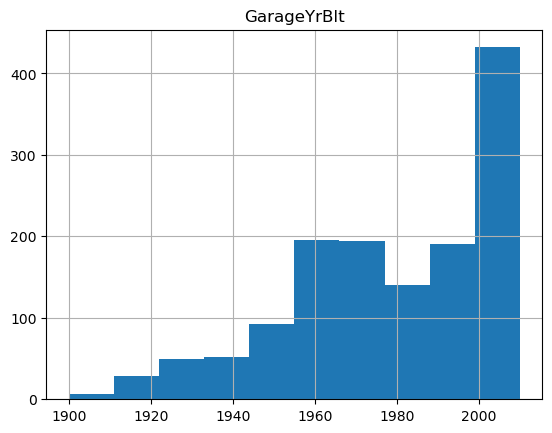

In [11]:
# visualizing lot frontage
data.hist('GarageYrBlt')
plt.show()

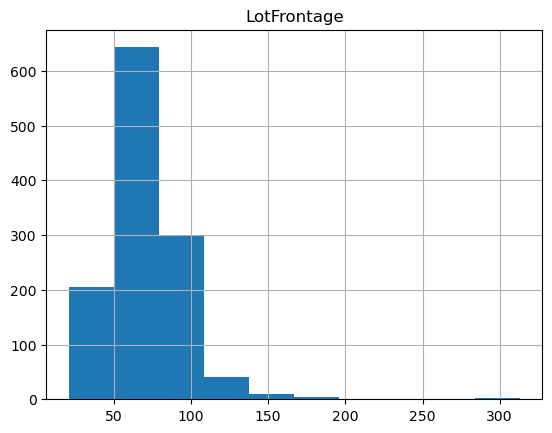

In [12]:
# visualizing lot frontage
data.hist('LotFrontage')
plt.show()

In [13]:
#filling missing data using mean & median
data['LotFrontage'].fillna(data['LotFrontage'].mean(), inplace = True)
data['GarageYrBlt'].fillna(data['GarageYrBlt'].mean(), inplace = True)

In [14]:
# dropping missing data
data.dropna(subset=[ 'MasVnrArea', 'Electrical', 'MasVnrType'], inplace=True)

In [15]:
#changing datatypes
data['MSSubClass']=data['MSSubClass'].astype(object)
data['OverallQual']=data['OverallQual'].astype(object)
data['OverallCond']=data['OverallCond'].astype(object)
data['GarageYrBlt']=data['GarageYrBlt'].astype('int64')

<AxesSubplot:>

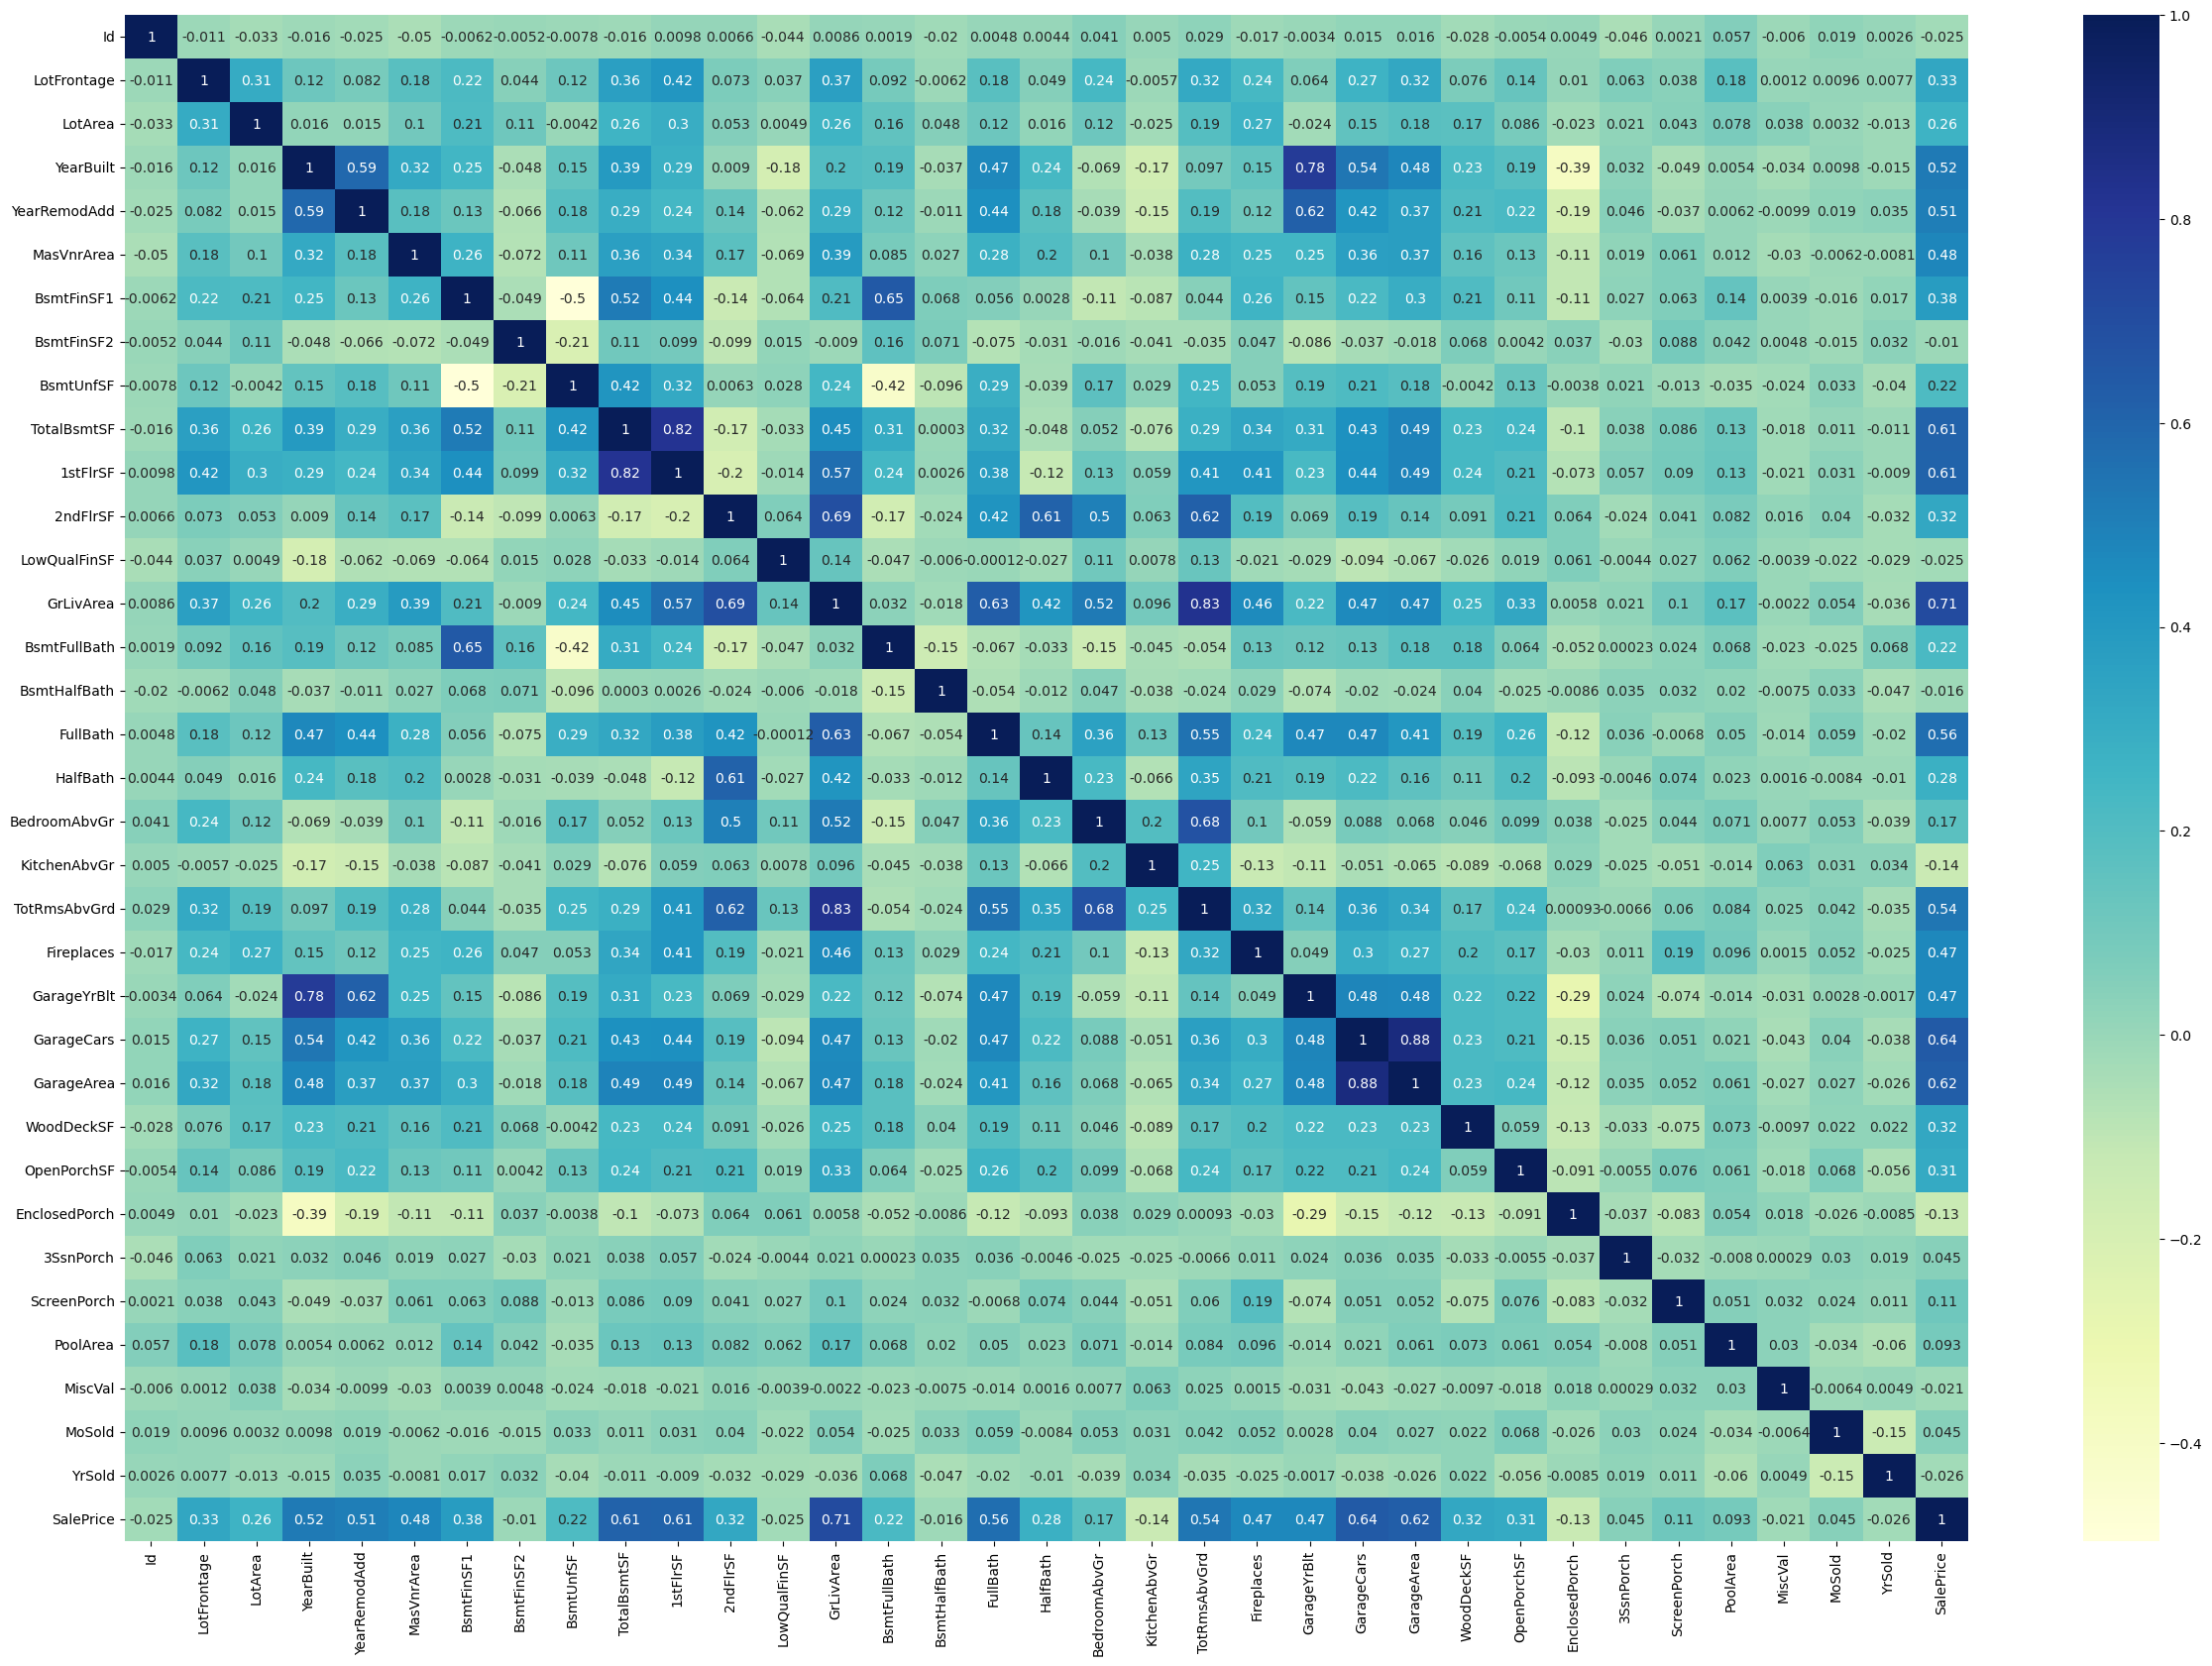

In [16]:
# Plotting an heatmap to show correlations
plt.figure(figsize=(30, 20))
sns.heatmap(data.corr(), cmap="YlGnBu", annot=True)

In [17]:
# joining the month and year sold column
data['DateSold'] =pd.to_datetime(data.YrSold.astype(str) + '/' + data.MoSold.astype(str) + '/01')

In [18]:
# converting datetime to numeric
data['DateSold'] = pd.to_numeric(pd.to_datetime(data['DateSold']))

In [19]:
#dropping columns
data = data.drop(columns=['Id','MoSold','YrSold'], axis=1)

In [20]:
#seperating dataset numerical and categorical 
num_data= data[['LotFrontage','LotArea', 'YearBuilt', 'YearRemodAdd','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF', '2ndFlrSF','LowQualFinSF','GrLivArea','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr', 'KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageYrBlt','GarageCars','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea', 'MiscVal']]
cat_data= data[['MSSubClass', 'MSZoning','Street','Alley','LotShape', 'LandContour','Utilities','LotConfig','LandSlope','Neighborhood','Condition1','Condition2','BldgType','HouseStyle','OverallQual', 'OverallCond','RoofStyle','Exterior1st','Exterior2nd','MasVnrType','ExterQual','ExterCond','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Heating','HeatingQC','CentralAir','Electrical','KitchenQual','Functional','FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive','PoolQC','Fence','MiscFeature','SaleType', 'SaleCondition']]

In [21]:
data[['BedroomAbvGr','TotRmsAbvGrd', 'KitchenAbvGr', 'FullBath','HalfBath']]

,BedroomAbvGr,TotRmsAbvGrd,KitchenAbvGr,FullBath,HalfBath
0,3,8,1,2,1
1,3,6,1,2,0
2,3,6,1,2,1
3,3,7,1,1,0
4,4,9,1,2,1
...,...,...,...,...,...
1455,3,7,1,2,1
1456,3,7,1,2,0
1457,4,9,1,2,0
1458,2,5,1,1,0


In [22]:
import itertools

for col_a, col_b in itertools.combinations(num_data.columns, 2):
    num_data.loc[:,col_a + 'x' + col_b] = num_data[col_a] * num_data[col_b]


C:\Users\CGX\AppData\Local\Temp\ipykernel_9320\909965543.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  num_data.loc[:,col_a + 'x' + col_b] = num_data[col_a] * num_data[col_b]
C:\Users\CGX\AppData\Local\Temp\ipykernel_9320\909965543.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  num_data.loc[:,col_a + 'x' + col_b] = num_data[col_a] * num_data[col_b]
C:\Users\CGX\AppData\Local\Temp\ipykernel_9320\909965543.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFr

In [23]:
num_data.head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,EnclosedPorchx3SsnPorch,EnclosedPorchxScreenPorch,EnclosedPorchxPoolArea,EnclosedPorchxMiscVal,3SsnPorchxScreenPorch,3SsnPorchxPoolArea,3SsnPorchxMiscVal,ScreenPorchxPoolArea,ScreenPorchxMiscVal,PoolAreaxMiscVal
0,65.0,8450,2003,2003,196.0,706,0,150,856,856,...,0,0,0,0,0,0,0,0,0,0
1,80.0,9600,1976,1976,0.0,978,0,284,1262,1262,...,0,0,0,0,0,0,0,0,0,0
2,68.0,11250,2001,2002,162.0,486,0,434,920,920,...,0,0,0,0,0,0,0,0,0,0
3,60.0,9550,1915,1970,0.0,216,0,540,756,961,...,0,0,0,0,0,0,0,0,0,0
4,84.0,14260,2000,2000,350.0,655,0,490,1145,1145,...,0,0,0,0,0,0,0,0,0,0


In [24]:
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,SaleType,SaleCondition,SalePrice,DateSold
0,60,RL,65.0,8450,Pave,No_Alley,Reg,Lvl,AllPub,Inside,...,0,0,No_PoolQC,No_Fence,No_MiscFeature,0,WD,Normal,208500,1201824000000000000
1,20,RL,80.0,9600,Pave,No_Alley,Reg,Lvl,AllPub,FR2,...,0,0,No_PoolQC,No_Fence,No_MiscFeature,0,WD,Normal,181500,1177977600000000000
2,60,RL,68.0,11250,Pave,No_Alley,IR1,Lvl,AllPub,Inside,...,0,0,No_PoolQC,No_Fence,No_MiscFeature,0,WD,Normal,223500,1220227200000000000
3,70,RL,60.0,9550,Pave,No_Alley,IR1,Lvl,AllPub,Corner,...,0,0,No_PoolQC,No_Fence,No_MiscFeature,0,WD,Abnorml,140000,1138752000000000000
4,60,RL,84.0,14260,Pave,No_Alley,IR1,Lvl,AllPub,FR2,...,0,0,No_PoolQC,No_Fence,No_MiscFeature,0,WD,Normal,250000,1228089600000000000


In [25]:
# seperating dataset into features and target for target enconding
X= cat_data
y = data['SalePrice'].values

In [26]:
# spliting dataset into training and test sets
from sklearn.model_selection import train_test_split
train_size=0.6
X_train, X_rem, y_train, y_rem = train_test_split(X,y, train_size=0.6, random_state=42)
#Now since we want the valid and test size to be equal (20% each of overall data). we have to define valid_size=0.5 (that is 50% of remaining data)
test_size = 0.5
X_valid, X_test, y_valid, y_test = train_test_split(X_rem,y_rem, test_size=0.5, random_state=42)

In [27]:
print(X_train.shape), print(y_train.shape)
print(X_valid.shape), print(y_valid.shape)
print(X_test.shape), print(y_test.shape)

(870, 45)
(870,)
(290, 45)
(290,)
(291, 45)
(291,)


(None, None)

In [28]:
from sklearn.model_selection import KFold

In [29]:
def target_encode(df_train, df_test, col, target):
    # Calculate mean target variable value for each category in training set
    mean = df_train[target].groupby(df_train[col]).mean()
    
    # Map categories to mean target variable value in both training and validation sets
    df_train[col] = df_train[col].map(mean)
    df_test[col] = df_test[col].map(mean)
    
    # Fill missing values with overall mean of target variable in training set
    overall_mean = df_train[target].mean()
    df_train[col].fillna(overall_mean, inplace=True)
    df_test[col].fillna(overall_mean, inplace=True)

# Apply target encoding to categorical columns in training and validation sets
kf = KFold(n_splits=5, shuffle=True, random_state=42)
for col in cat_data:
    for train_index, valid_index in kf.split(X_train):
        # Split training data into training and validation subsets for cross-validation
        train_subset = X_train[train_index]
        valid_subset = X_train.iloc[valid_index]
        
        # Apply target encoding to training and validation subsets
        target_encode(train_subset, valid_subset, col, y)
        
        # Update target encoded training and validation subsets in original training set
        train_data.iloc[train_index] = train_subset
        train_data.iloc[valid_index] = valid_subset
    
    # Apply target encoding to validation set using full training set
    target_encode(X_train, X_valid, col, y)



KeyError: "None of [Int64Index([  0,   1,   2,   3,   4,   6,   7,   8,   9,  11,\n            ...\n            857, 858, 859, 860, 861, 862, 863, 866, 867, 869],\n           dtype='int64', length=696)] are in the [columns]"

In [ ]:
data.reset_index(drop=True, inplace=True)

In [30]:
from category_encoders import TargetEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error



In [31]:
# Define the target encoder
encoder = TargetEncoder(cols=cat_data)

# Fit the encoder on the training set and transform both the training and validation sets
train_encoded = encoder.fit_transform(X_train, y_train)
val_encoded = encoder.transform(X_valid)

# Train a random forest regression model on the encoded training data
reg = RandomForestRegressor(n_estimators=100, random_state=42)
reg.fit(train_encoded.drop(y_train, axis=1), train_encoded[y_train])

# Evaluate the model on the encoded validation data
preds = reg.predict(val_encoded.drop(y_train, axis=1))
mse = mean_squared_error(val_encoded[y_train], preds)


KeyError: '[342643, 215200, 333168, 135000, 113000, 213000, 80500, 120000, 140000, 106000, 109500, 115000, 285000, 189000, 180000, 121600, 253293, 79900, 186000, 165000, 132000, 158000, 180000, 135000, 260000, 119000, 37900, 129000, 149900, 206900, 168000, 156932, 143000, 124500, 207500, 118000, 223500, 307000, 119900, 140000, 149500, 191000, 134450, 216000, 306000, 255000, 224000, 142000, 119500, 133000, 139900, 189000, 220000, 256300, 214000, 139000, 249700, 100000, 318061, 180500, 556581, 156000, 180000, 225000, 138500, 185000, 149300, 285000, 319900, 367294, 315750, 93000, 260400, 137000, 392500, 107500, 205000, 167000, 134900, 170000, 302000, 287000, 158000, 163500, 137500, 127000, 185000, 156000, 106250, 216837, 194500, 120000, 180000, 136900, 144000, 265900, 110000, 395000, 110000, 129500, 252000, 133500, 106000, 130500, 200000, 171000, 176500, 193500, 154900, 250000, 133000, 149900, 374000, 127500, 277000, 82500, 199900, 254000, 228950, 94750, 131400, 242000, 118964, 212000, 136905, 90000, 147400, 147000, 149900, 147000, 91500, 426000, 185500, 189000, 120500, 225000, 155000, 224900, 87000, 76500, 154000, 745000, 129500, 204750, 140000, 165500, 154000, 120000, 190000, 128500, 130500, 205000, 137500, 173900, 127000, 168500, 169000, 245000, 161000, 109500, 128500, 195000, 84900, 119000, 98300, 162000, 111000, 161500, 150000, 144000, 100000, 239799, 169500, 148000, 128000, 197000, 167900, 202500, 207500, 186700, 113000, 97000, 130000, 104900, 219500, 320000, 176432, 235000, 112000, 118000, 110000, 102776, 207500, 319000, 119000, 250000, 245350, 234000, 294000, 167900, 155000, 222000, 262500, 125000, 140000, 135000, 179000, 122000, 108000, 248000, 172500, 215000, 312500, 172500, 170000, 88000, 213490, 84500, 200000, 224900, 173500, 259000, 130000, 139000, 142000, 119000, 105000, 202500, 83500, 97000, 227000, 123000, 194000, 132250, 166000, 132000, 179900, 127500, 92900, 377500, 118000, 39300, 173000, 290000, 136500, 125000, 287090, 169000, 252678, 110000, 141000, 271000, 127000, 250580, 140000, 112000, 108000, 192140, 220000, 233170, 109500, 339750, 162900, 161000, 116900, 124500, 159895, 154000, 125000, 208500, 145000, 151000, 58500, 208900, 186500, 196500, 264561, 137000, 214000, 240000, 239000, 280000, 84500, 176000, 107500, 189950, 159500, 109900, 257000, 200100, 68400, 187500, 181134, 173000, 225000, 135500, 244000, 267000, 99500, 145250, 140000, 170000, 113000, 155000, 128000, 147000, 430000, 315000, 155000, 113000, 152000, 207500, 265000, 130000, 201000, 79000, 55000, 228000, 325624, 88000, 163000, 234000, 93000, 287000, 172785, 144900, 229456, 79500, 275500, 197900, 171000, 89500, 163000, 161750, 220000, 150750, 224000, 179900, 219210, 475000, 170000, 176000, 115000, 109000, 142600, 214000, 132500, 105000, 132500, 187000, 165000, 154000, 124000, 195000, 80000, 135500, 127000, 165000, 215000, 158000, 180000, 240000, 239900, 275000, 225000, 175500, 175500, 91000, 135000, 94500, 127500, 123000, 147000, 211000, 159000, 162000, 118000, 87500, 206000, 178000, 194201, 101000, 145000, 139000, 239000, 303477, 197000, 105000, 192000, 174000, 123500, 162000, 160000, 145000, 179000, 140000, 230500, 132500, 295493, 255900, 263000, 381000, 755000, 142000, 184000, 169990, 256000, 200500, 109000, 372500, 337000, 394617, 187500, 206300, 148000, 115000, 107400, 193000, 144000, 226700, 185000, 148500, 163900, 314813, 259500, 126000, 151000, 167500, 207500, 152000, 137500, 123600, 215000, 134500, 160000, 212000, 120000, 174500, 282922, 218000, 119000, 345000, 169500, 164700, 108480, 176000, 127000, 335000, 170000, 320000, 611657, 179900, 231500, 377426, 193879, 158000, 194000, 102000, 150500, 270000, 159500, 159000, 230000, 134000, 175500, 82000, 122500, 251000, 107000, 173733, 171000, 187500, 127500, 133900, 119200, 196000, 232000, 235000, 183900, 142125, 269790, 118500, 302000, 137900, 160000, 170000, 118000, 134000, 200000, 237500, 225000, 139000, 175000, 167000, 163990, 167000, 93000, 172400, 148000, 97500, 244400, 385000, 236000, 239686, 301500, 185000, 136500, 221500, 250000, 102000, 378500, 73000, 124000, 125000, 210000, 240000, 160000, 140000, 130000, 305900, 153500, 178000, 115000, 145000, 177000, 196000, 103000, 153500, 190000, 85500, 145500, 245500, 129900, 354000, 139000, 148800, 309000, 128000, 166000, 179200, 280000, 193000, 272000, 100000, 151400, 137000, 239500, 233000, 115000, 125000, 178900, 147000, 153000, 392000, 120000, 124000, 90000, 87000, 201000, 117000, 64500, 315000, 149000, 91000, 271000, 112000, 359100, 177000, 205000, 184000, 99900, 115000, 117000, 211000, 219500, 380000, 269500, 149000, 155900, 125000, 402000, 174000, 112500, 197000, 239000, 466500, 179200, 200000, 112000, 134800, 90350, 179900, 192500, 153000, 217000, 200141, 212000, 230000, 174000, 141000, 177000, 226000, 181000, 194000, 125000, 256000, 582933, 162500, 116500, 125000, 232600, 138887, 157000, 35311, 190000, 200000, 164900, 197500, 143000, 198900, 143000, 115000, 143000, 385000, 372402, 168000, 340000, 141000, 157000, 215000, 129900, 176000, 147000, 178000, 210000, 145000, 135000, 223000, 118500, 112000, 160000, 151500, 130000, 130000, 122000, 440000, 345000, 157900, 250000, 255500, 117500, 86000, 72500, 115000, 105000, 258000, 185000, 232000, 110000, 124000, 173000, 120500, 190000, 313000, 204000, 156000, 395192, 235000, 145000, 228500, 167000, 176500, 164990, 136000, 145000, 112000, 144000, 140000, 136000, 274300, 185000, 192000, 278000, 174000, 167240, 152000, 181500, 383970, 140000, 246578, 145000, 83000, 275000, 162900, 424870, 180500, 129000, 52500, 181000, 155000, 260000, 108000, 189000, 180500, 110000, 168500, 144000, 127500, 144000, 128900, 215000, 485000, 155000, 160000, 175000, 221000, 131500, 318000, 177000, 189000, 176000, 328000, 213250, 116050, 162000, 171000, 147000, 185000, 167500, 128000, 185750, 299800, 248900, 118858, 278000, 143900, 100000, 110000, 133000, 67000, 538000, 155000, 129500, 119750, 370878, 75500, 214900, 110000, 227875, 83000, 223500, 177000, 289000, 138800, 90000, 320000, 187100, 140000, 180000, 248000, 160000, 191000, 148000, 179000, 153575, 142000, 106500, 110000, 235000, 136500, 84500, 235128, 150000, 219500, 157000, 95000, 135000, 155000, 127000, 135000, 196500, 210000, 194500, 192000, 187500, 202500, 124500, 152000, 87000, 139000, 98000, 266500, 155000, 266000, 86000, 171500, 412500, 222500, 108000, 55000, 102000, 214000, 293077, 197000, 188000, 180500, 277500, 144000, 124500, 149700, 137450, 98600, 165500, 110000, 325000, 117000, 135000, 79000, 279500, 260000, 220000, 191000, 325000, 190000, 141000, 325300, 155000, 146000, 139950, 139000, 268000, 274970, 194700, 272000, 286000, 336000, 361919, 202665, 137500, 132500, 250000, 96500, 158000, 139400, 108500, 263435, 168000, 141000, 155000, 134000, 81000, 159950, 85000, 107000, 123000, 226000, 66500, 140000, 275000, 164500, 139000, 178000, 146500, 100000, 176485, 119500, 119000, 290000, 132500, 117500] not found in axis'

In [ ]:
pip show category_encoders